<a href="https://colab.research.google.com/github/Shubham00722Shah/test_repo_aug/blob/main/Revision_notes_06_ProbabilityDistributions_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='red'>**Disclaimer: Please note that any topics that are not covered in today’s lecture will be covered in the next lecture**.</font>

## <font color='blue'>**Content**</font>

- Empirical vs Theoretical Probability
- Expectations
- Binomial Distribution
- Bernoulli Distribution



## <font color='blue'>**Distribution Functions**</font>  

**Probability Density Function (PDF)**:  
- The PDF is a function that describes the probability density of a continuous random variable over its range.  

-  The term "density" here is similar to how tightly data is packed around a specific point, like cars on a road.

**Probability Mass Function (PMF)**:  
- The PMF is a function that describes the probability of a discrete random variable taking on a specific value.  

**Cumulative Distribution Function (CDF)**:  
- The CDF is a function that gives the probability that a random variable is less than or equal to a specified value.

Let's implement this using a height dataset

We will going to work on the height dataframe that we saw above for now

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo -O weight-height.csv

--2024-06-27 17:49:26--  https://drive.google.com/uc?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo
Resolving drive.google.com (drive.google.com)... 74.125.204.102, 74.125.204.100, 74.125.204.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.204.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo [following]
--2024-06-27 17:49:26--  https://drive.usercontent.google.com/download?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.189.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428120 (418K) [application/octet-stream]
Saving to: ‘weight-height.csv’

weight-height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.004s  

2024-06-27 17:49:27 (112 MB/s

In [ ]:
df_hw = pd.read_csv("weight-height.csv")

In [ ]:
df_height = df_hw["Height"]
df_height.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [ ]:
# minimum height
min_height = df_height.min()
min_height

54.2631333250971

In [ ]:
# maximum height
max_height = df_height.max()
max_height

78.9987423463896

In [ ]:
total = len(df_height)
total

10000

To plot this type of distribution we generally use Histograms or Distribution plots  

### <font color='blue'>**Histogram**</font>  

It is a graphical representation of a dataset's distribution, showing the frequency or probability of different values within the data.  





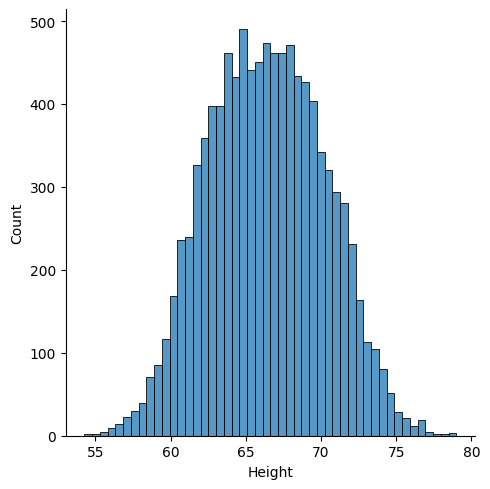

In [ ]:
sns.displot(df_height)

> <font color='purple'>Q.What we can understand from this distribution?</font>  

- Each bar in the histogram represents one of the intervals or ranges,  

- The height of the bar indicates the frequency or number of data points falling within that interval.  


<font color='purple'>**Count**</font>:  

- It indicates the "**frequency**", which means in the particular bar or range of height, how many values are there.  

  - We can assert this like, <font color='purple'>around 500 people have their height in the range of 63 - 65 (that on bar)</font>  

This is what histograms or distribution plots tell about the data

Now let's have a look into some distribution functions

### <font color='purple'>**Probability Mass Function (PMF)**</font>  

The PMF is a function that describes the probability of a discrete random variable taking on a specific value.  

It associates each possible value of the random variable with its probability of occurrence.  

<font color='purple'>**Example: Rolling a Fair Six-Sided Die**</font>  

- For example, if we have a discrete random variable $X$ representing the outcome of rolling a fair six-sided die, the PMF might look like
  - <font color='purple'>$P(X = 1) = \frac{1}{6}$, $P(X = 2) = \frac{1}{6}$</font>, and so on.  



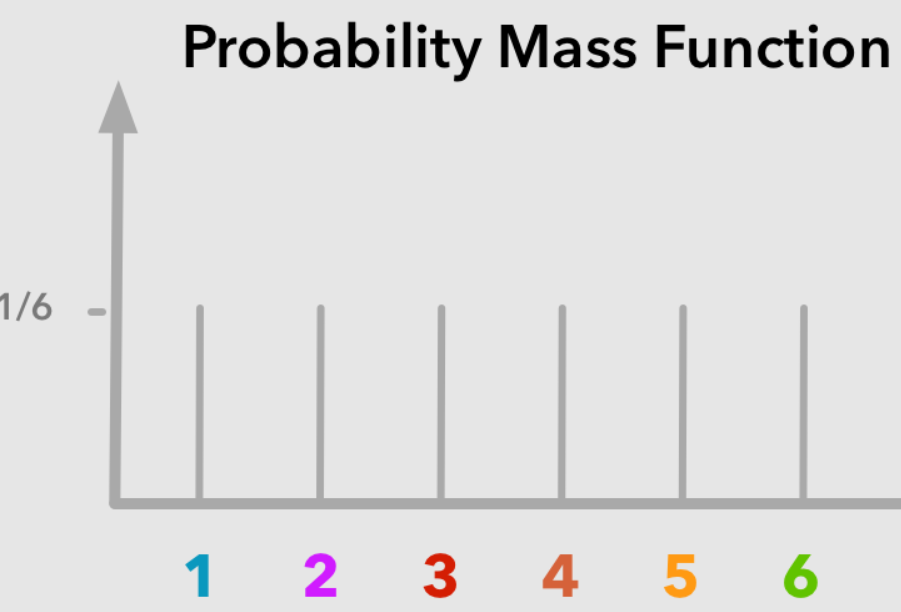

### <font color='purple'>**Probability Density Function (PDF)**</font>  

**PDF is used for continuous random variables**, as opposed to PMF, which is for discrete variables.   

PDF does not provide the probability of a specific value but gives the <font color='purple'>**probability of the random variable falling within a certain interval**</font>


-   For instance, it answers questions like "What are the chances that the next height chosen will fall between 62 and 65 inches?"

We can visualize a PDF by using distribution plots like histograms or KDE (Kernel Density Estimation ) plots.  





<Axes: xlabel='Height', ylabel='Density'>

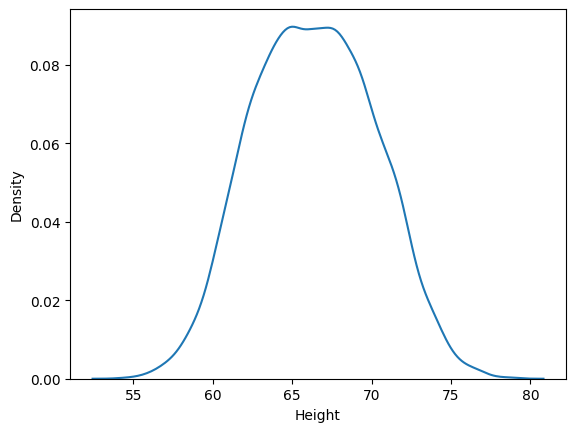

In [ ]:
sns.kdeplot(df_height)

<font color='purple'>**Example:**</font>  

If we have a continuous random variable Y representing the height of people in a population,   

The <font color='purple'>PDF might represent the probability that a randomly chosen person has a height within a certain range, such as between 65 and 70</font>.   


- We will find out the area under that interval to find the probability

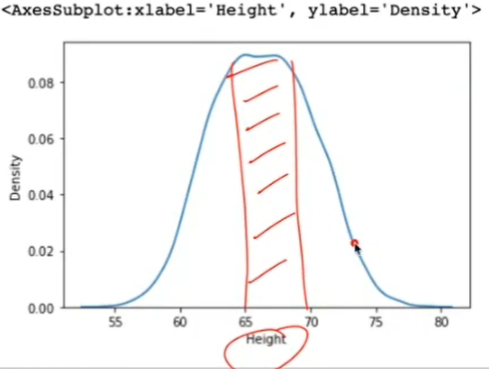

Next up we have:

### <font color='purple'>**Cumulative Distribution Function (CDF)**</font>

The Cumulative Distribution Function (CDF) describes the <font color='purple'>probability that a random variable takes on a value less than or equal to a given value</font>.
  

In the context of this dataset, in CDF, we talk about fractions of people who are less than the given height

- Let's say you take <font color='purple'>60 inches, then what fraction of the people have less than or equal to this value?</font> This fraction is calculated using CDF    

- It gives you the cumulative probability up to a certain point.  

<font color='purple'>**Example:**</font>  

 If you have a random variable Z representing the number of heads in three coin tosses,   

 The CDF would tell you the <font color='purple'>probability that Z is less than or equal to a certain number, like P(Z ≤ 2)</font>.

<br>



> <font color='purple'>**How to calculate CDF**?</font>  

The **CDF is calculated by accumulating the probabilities for each height value**.   

- As you move along the X-axis (height values) on the CDF graph, you're essentially adding up the probabilities

- It shows how likely it is to find someone with a height less than or equal to that value.

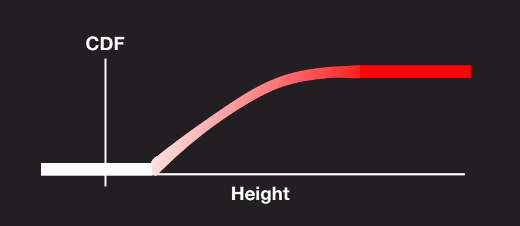

- The CDF graph typically starts at <font color='purple'>0% on the Y-axis (probability) when height is at its minimum</font> (in our dataset)  

- It ends at <font color='purple'>100% when height is at its maximum</font>.   

- The curve starts at the left and gradually climbs towards the right.

- The steepness of the curve at a particular point represents how quickly the probability is accumulating


<font color='orange'>**Conclusion**</font>  

So, the PDF shows you the probability of a specific height, while the CDF shows you the probability of heights up to a certain value in your dataset.

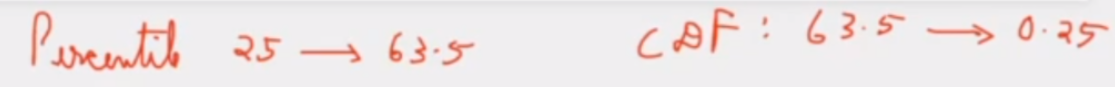

### <font color='orange'>**Conclusion :**</font>  

In summary, the relationships are as follows:  

- The <font color='purple'>PMF is used for discrete random variables</font>.  

- The <font color='purple'>PDF is used for continuous random variables</font>.  

- The <font color='purple'>CDF is used for both</font> discrete and continuous random variables to provide cumulative probabilities.  


These functions are essential tools in probability and statistics for understanding the behaviour of different probability distributions.

## <font color='blue'>**Case study on Empirical vs Theoretical Probability</font>**

### <font color='purple'>**Casino Case Study**</font>


A bag has **<font color='red'>3 Red</font>** and **<font color='blue'>2 Blue</font>** balls.

You pick a ball, write its colour, and **<font color='orange'>put it back</font>** in the bag. This is done **<font color='brown'>4 times</font>** in total.

If all 4 times, the **<font color='red'>Red balls</font>** was drawn, you **<font color='green'>win Rs 150</font>**.

Otherwise you **<font color='violet'>lose Rs 10</font>**.

**Question : Would engaging in this game result in a profit or loss for you?**


**Discuss:**
- Problem mentions that once you've noted the color, `you put it back in the bag`
 - What does this mean in the probabillity language?
 - It means that the balls are drawn **with replacement**
- The step of taking out the ball is repeated 4 times

<br>

Whether you end up gaining or losing will depend on how many red balls are drawn.   


Therefore, let's define a random variable $X$ to denote the number of red balls drawn.
- Hence, $X$ will be a discrete random variable.
- Possible outcomes of $X$: $0, 1, 2, 3$ or $4$


### <font color='purple'>**Empirical Approach**</font>


### <font color='purple'>**Motivation for Empirical Approach**</font>

We know that it is possible to get 7 heads on 10 coin tosses, when using a fair coin.

So how would one go about proving that P(Heads) = 0.5 for a fair coin?

><font color='purple'> **How many of you have heard about the scientist who wanted to prove this?**</font>

In order to do so, he tossed a fair coin 10,000 times repeatedly, and noted down his observation on each toss.

The idea was
- Though 7 heads is probable for 10 tosses, when a coin is tossed for 10,000 times, the number of heads should be approximately 5,000

<font color='purple'>This process of simulating the experiment, and repeating it multiple times, is done in an effort to calculate probability value (of getting heads in this example)</font>.

This value is known as **Empirical Probability**.
- The idea is make estimates **using real-world data/observations**




Let's try to estimate whether we will have a profit or loss after playing this game, using probabilities caluclated by empirical approach.

For this, we will simulate this situation in Python code.

In [ ]:
import math as m
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

> <font color='purple'>**Let's simulate the given Casino problem using `np.random.choice()`**</font>

Since we have,
- 3 red balls and
- 2 blue balls

We can represent the possible outcomes as a list `["R", "R", "R", "B", "B"]`

Since the ball is being drawn 4 times, we set `size = 4`

Notice that every time we execute the following code, we will get a different result, and they're being chosen randomly each time.

In [ ]:
#Code to be shared to learners
rolls=np.random.choice(["R","R","R","B","B"],size=4)
rolls

array(['R', 'B', 'B', 'R'], dtype='<U1')


Recall that $X$ represents the number of red balls drawn in a simulation.

#### <font color='purple'>How to evaluate $X$ from a simulation?</font>


1. Create a Boolean mask having all observed `"R" as True` and `"B" as False`
2. Use **`np.count_nonzero()`** to count number of `True` in the mask.




In [ ]:
# rolls=="R" creates a Boolean mask
# count_nonzero() counts the number of non-zero OR True elements in the passed list.

np.count_nonzero(rolls=="R")

2


Let's take inspiration from the scientist and perform this simulation 10,000 times using a code, and note our observations.

<font color='purple'>**Discuss:**</font>
- We already know how to simulate a ball draw
- Let's store the no of reds observed in a variable `num_red`
- And store this value for all 10,000 simulations into a list `red_values`

In [ ]:
red_values=[]

for person in range(10000):
    rolls=np.random.choice(["R","R","R","B","B"],size=4)
    num_red=np.count_nonzero(rolls=="R")
    red_values.append(num_red)
pd.value_counts(red_values)

3    3552
2    3394
1    1496
4    1281
0     277
dtype: int64

In [ ]:
# red_values

Let's do a `.value_counts()` to see the frequency of values values
it contains.

In [ ]:
pd.value_counts(red_values,normalize=True)

3    0.3552
2    0.3394
1    0.1496
4    0.1281
0    0.0277
dtype: float64

We are aware that passing `normalize=True` in `value_counts()` gives us the result in percentage of their occurence.

We can see that the probability of drawing 3 red balls is 0.3552, 2 red balls is 0.3394 and so on..

> **Based on this data, how many red balls we will get on an average based on simulations we have done 10,000 times?**

In [ ]:
# This is empirical value
np.mean(red_values)

2.4064

### <font color='purple'>**Expectation using Empirical Approach**</font>

> <font color='purple'>**How do you think, this mean was calculated from these frequency values?**</font>

As you learnt in the last class, this was calculated as a result of **Weighted Average**

So, for the given frequency count, we can see that this is calculated as: $ Mean = \frac{4(1281) + 3(3552) + 2(3394) + 1(1496) + 0(277)}{1281 + 3552 + 3394 + 1496 + 277} = \frac{4(1281) + 3(3552) + 2(3394) + 1(1496) + 0(277)}{10000}$


In [ ]:
(4*(1281) + 3*(3552) + 2*(3394) + 1*(1496) + 0*(277)) / (10000)

2.4064

Now that we've verified this,

Let's represent the same equation in a slightly different format.

$Mean = 4 \frac{1281}{10000} + 3 \frac{3552}{10000} + 2 \frac{3394}{10000} + 1 \frac{1496}{10000} + 0 \frac{277}{10000}$

<br>

If you closely look at the value counts table, you will see that this can be represented as the following formula:

<font color='purple'>$E(X) = Σ_i X_i*P(X = X_i)$</font>

where
- $X$ was our random variable that denotes the no of red balls drawn.
- $P(X = X_i)$ represents the probability of X getting a value of $X_i$
- $E(X)$ is known as the **Expected value** of the random variable $X$

<br>

Let's define it formally:

`Expectation of a random variable X, is the weighted average of the values that X takes, with the weights being the probabilities.`



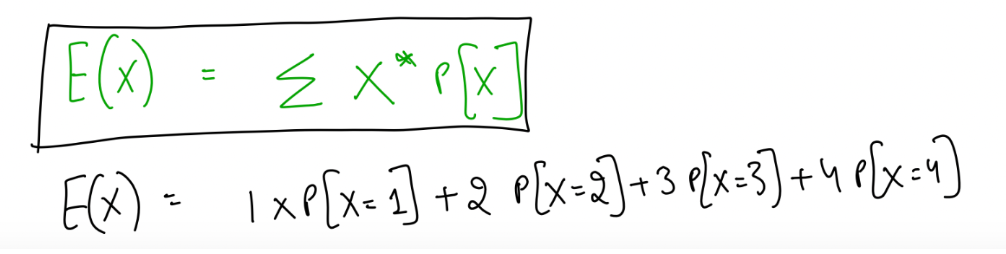


Until now, we simulated the event 10,000 times, and found an expected value of random variable X using the data observed.

This is known as the **Empirical Approach** of solving the problem.
<br>



### <font color='purple'>Theoretical Approach</font>

Now, let's solve this case study using theoretical approach and observe the difference in the result

Now let's discuss the theoretical approach to this Casino case study

Let's look at the problem statement once more.



A bag has **<font color='red'>3 Red</font>** and **<font color='blue'>2 Blue</font>** balls.

You pick a ball, write its colour, and **<font color='orange'>put it back</font>** in the bag. This is done **<font color='brown'>4 Times</font>** in total.

If all 4 times, the **<font color='red'>Red balls</font>** was drawn, you **<font color='green'>win Rs 150</font>**.

Otherwise you **<font color='violet'>lose Rs 10</font>**.

**Question: Would engaging in this game result in a profit or loss for you?**


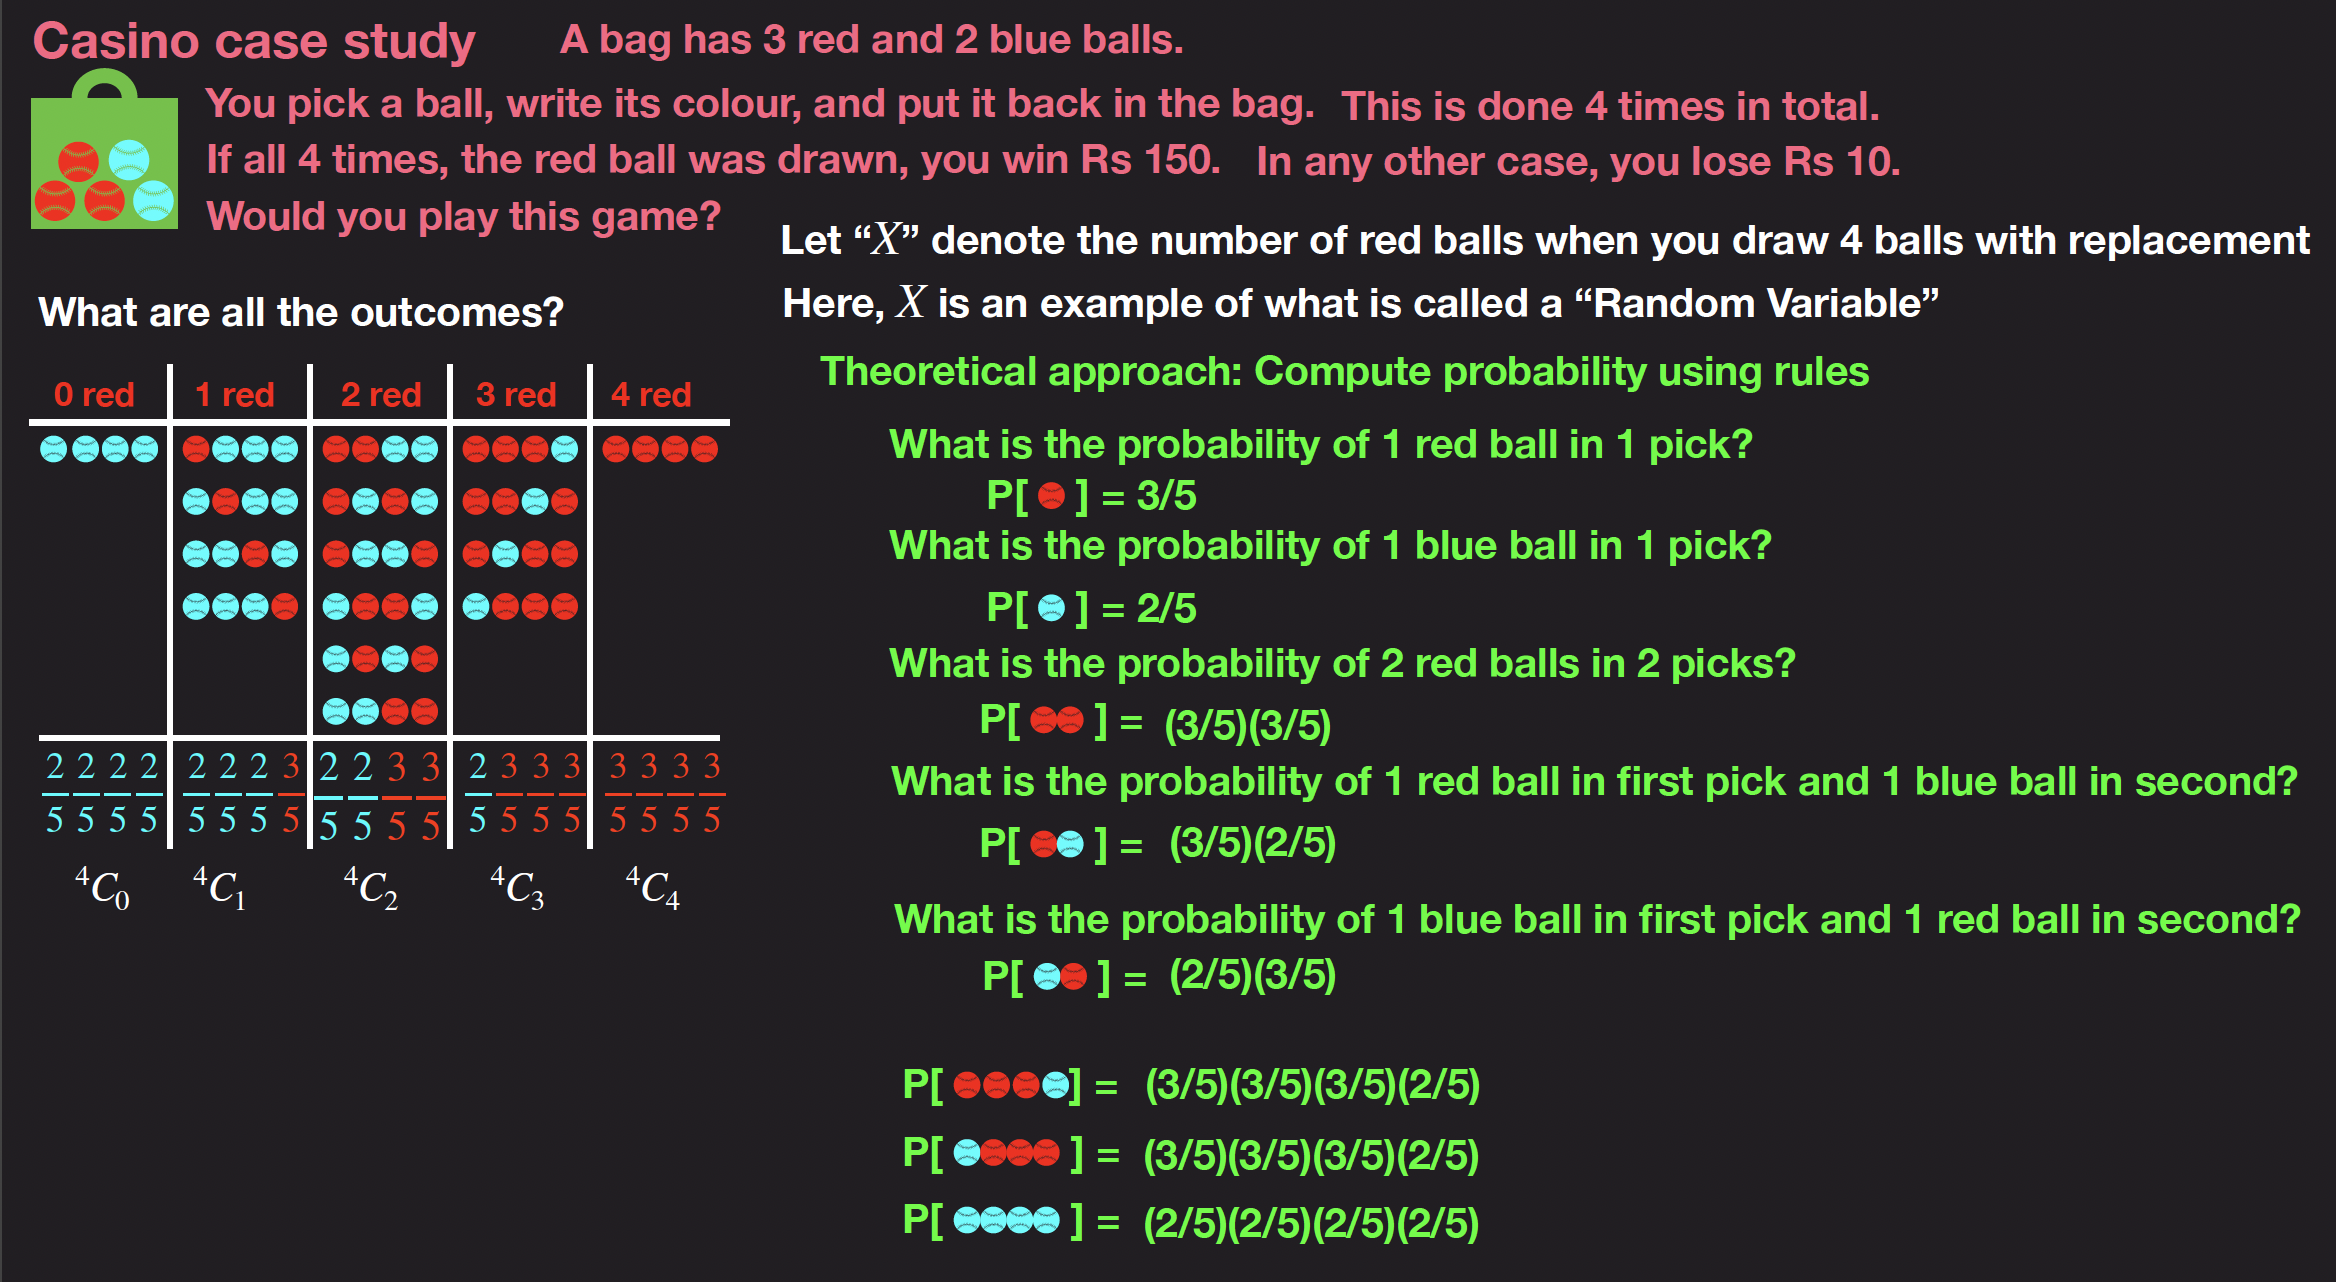

Let's define 2 events:
- $R$: Drawing a red ball
- $B$: Drawing a blue ball

> <font color='purple'>**What would be the probability of obtaining a red ball once?**</font>

$P(R) = \frac{3}{5}$

Similarly, we know that $P(B) = \frac{2}{5}$

> <font color='purple'>**What is the probability of drawing a red ball twice?**</font>

$P(RR) = \frac{3}{5} * \frac{3}{5}$

<br>

> <font color='purple'>**What is the probability of drawing a red ball followed by a blue ball?**</font>

$P(RB) = \frac{3}{5} * \frac{2}{5}$

<br>

These values are easy to evaluate when we are drawing the balls just twice.



In our case study, we are **drawing it 4 times**. Let's consider that case.

Like before, we define $X$ as a random variable that denotes the no of red balls drawn.


> <font color='purple'>**What would be the probability of obtaining 1 red ball?**</font>

For $X=1$, we can have 4 possible cases as drawn below:
- BBBR
- BBRB
- BRBB
- RBBB

Let's look at the probability value of each of these individual cases:
- Case 1: $\frac{2}{5} * \frac{2}{5} * \frac{2}{5} * \frac{3}{5}$
- Case 2: $\frac{2}{5} * \frac{2}{5} * \frac{3}{5}* \frac{2}{5}$  

and so on

So we can see that for all these 4 cases, we can write their <font color='purple'>probability as: $(\frac{2}{5})^3 * (\frac{3}{5})^1$</font>

<br>

Since there are 4 such cases, we write the total probability of $X = 1$ as:

<font color='purple'>$P(X = 1)$ = case 1 OR case 2 OR case 3 OR case 4</font>

<font color='purple'>$P(X = 1) = 4*(\frac{2}{5})^3 * (\frac{3}{5})^1$</font>

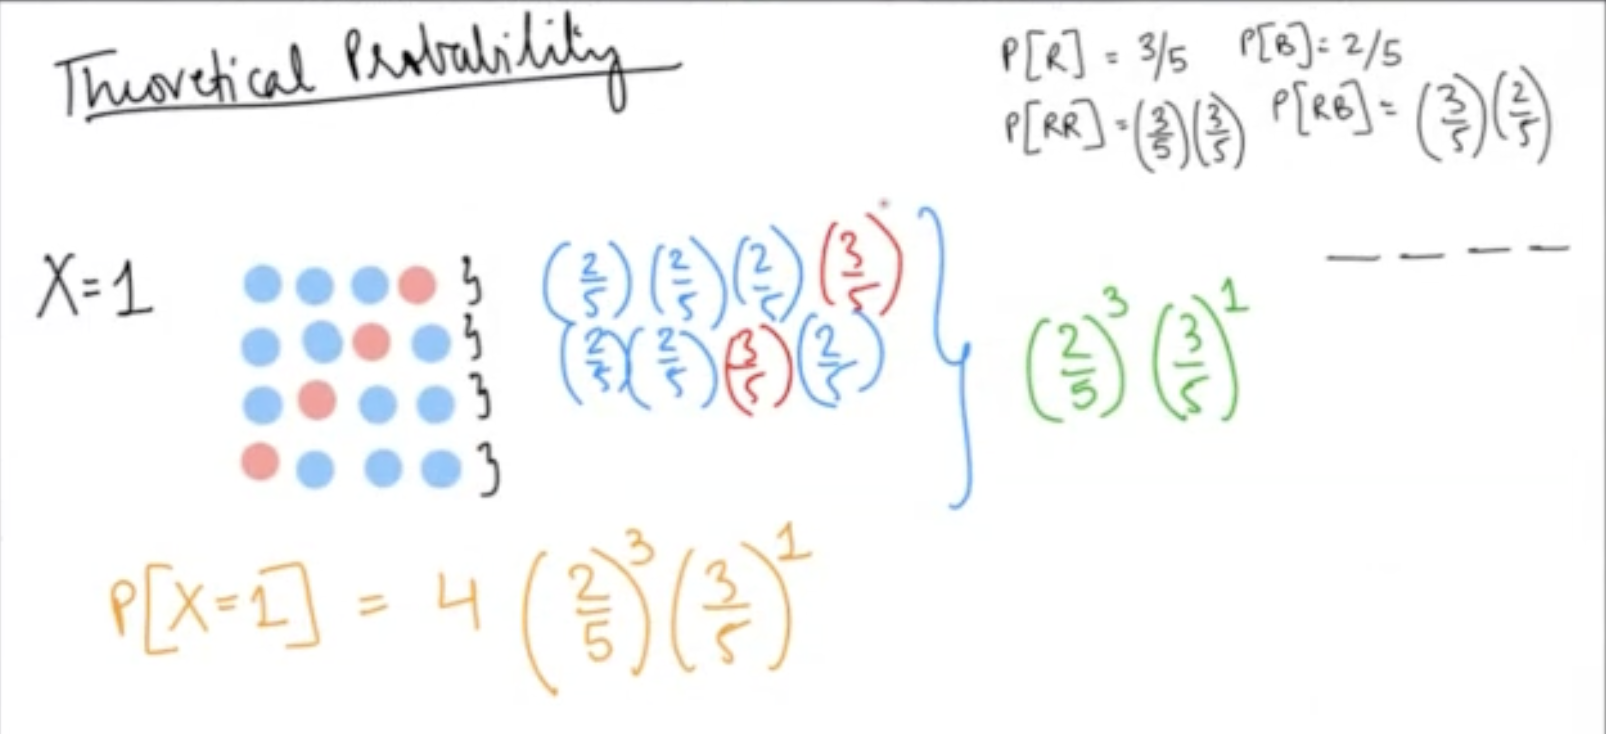

> <font color='purple'>**What would be the probability of getting 2 red balls out of the 4 balls drawn?**</font>

Let's look at the different orientations possible for $X = 2$.
- We have 6 possibilities.

Let's look at the probability of each of these orientations:
- <font color='purple'>Case 1: $\frac{2}{5}*\frac{2}{5}*\frac{3}{5}*\frac{3}{5}$</font>

... and so on

So, at the end of the day, we know that probability for each of these individual cases would be: <font color='purple'>$(\frac{2}{5})^2 * (\frac{3}{5})^2$</font>

Since either of these 6 cases are possible, the total probability becomes:

<font color='purple'>**$P(X=2) = 6*(\frac{2}{5})^2 * (\frac{3}{5})^2$**</font>


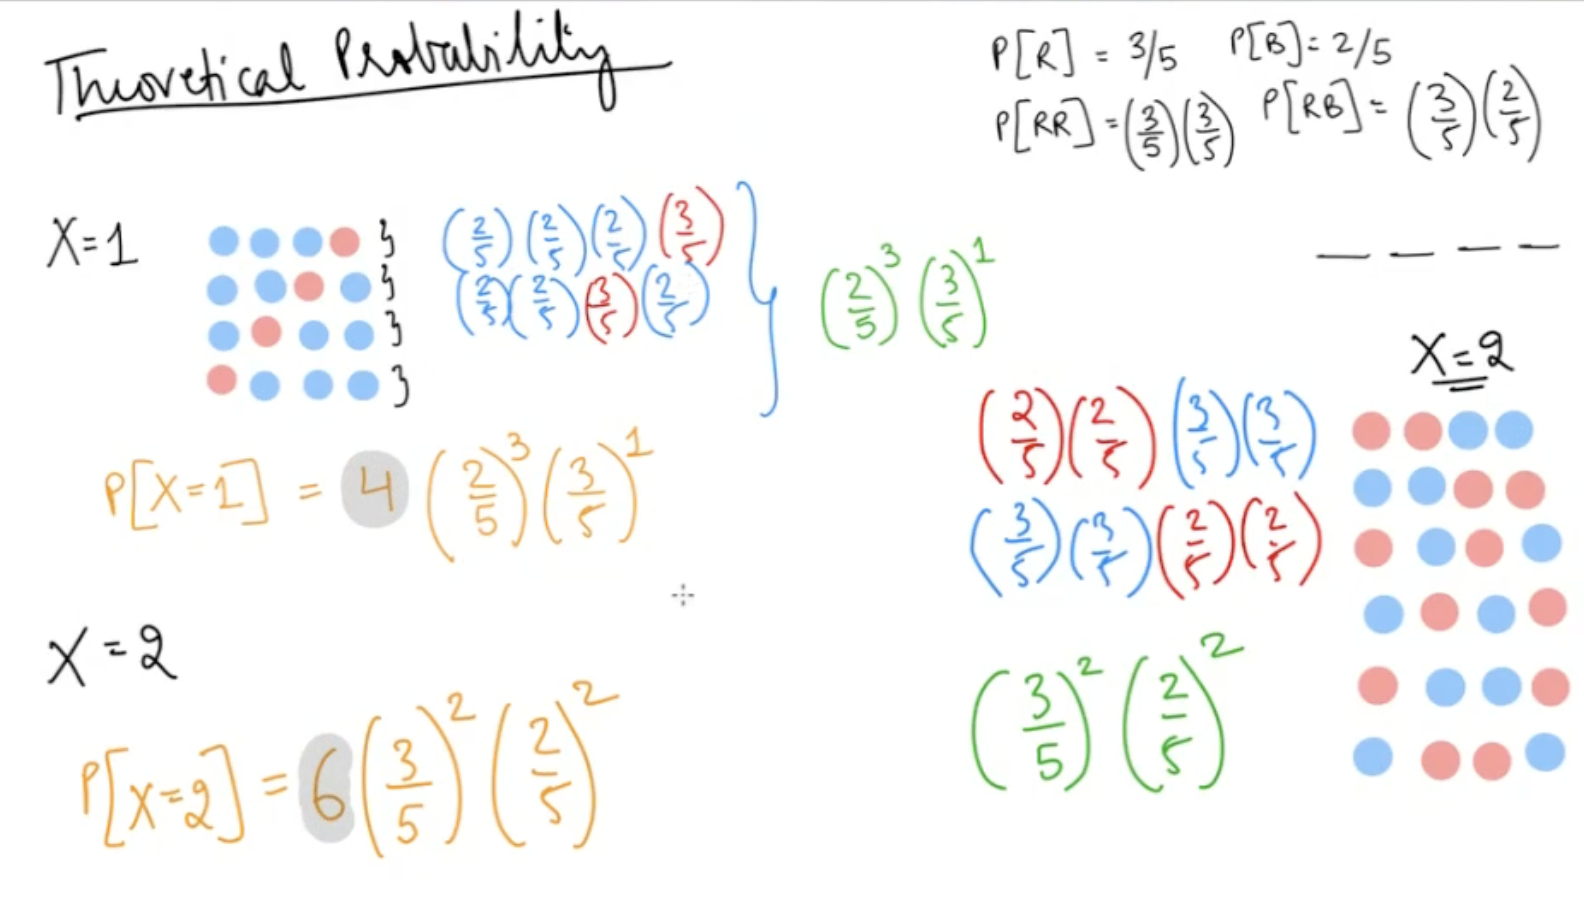

#### <font color='purple'>**Conclusion**</font>

> <font color='purple'>**Can we write this 4 and 6 in a different format?**</font>

Recall the combinatorics lecture.

We know that
- $4 = \ ^4C_1$
- $6 = \ ^4C_2$

<br>

> <font color='purple'>**With this in mind, when we take a look at the results of $P(X=1)$ and $P(X=2)$, can we derive some general expression?**</font>

$P(X = k) = \ ^4C_k \ (\frac{3}{5})^k \ (\frac{2}{5})^{4-k}$

Notice that here, `4` is nothing but the no of times a ball was drawn from the bag, i.e. **no of trials**

<br>

We can use this derived equation to find probability for all valid values of the random variable $X$:
- $P(X = 0) = \ ^4C_0 \ (\frac{3}{5})^0 \ (\frac{2}{5})^{4}$
- $P(X = 1) = \ ^4C_1 \ (\frac{3}{5})^1 \ (\frac{2}{5})^{3}$
- $P(X = 2) = \ ^4C_2 \ (\frac{3}{5})^2 \ (\frac{2}{5})^{2}$
- $P(X = 3) = \ ^4C_3 \ (\frac{3}{5})^3 \ (\frac{2}{5})^{1}$
- $P(X = 4) = \ ^4C_4 \ (\frac{3}{5})^4 \ (\frac{2}{5})^{0}$

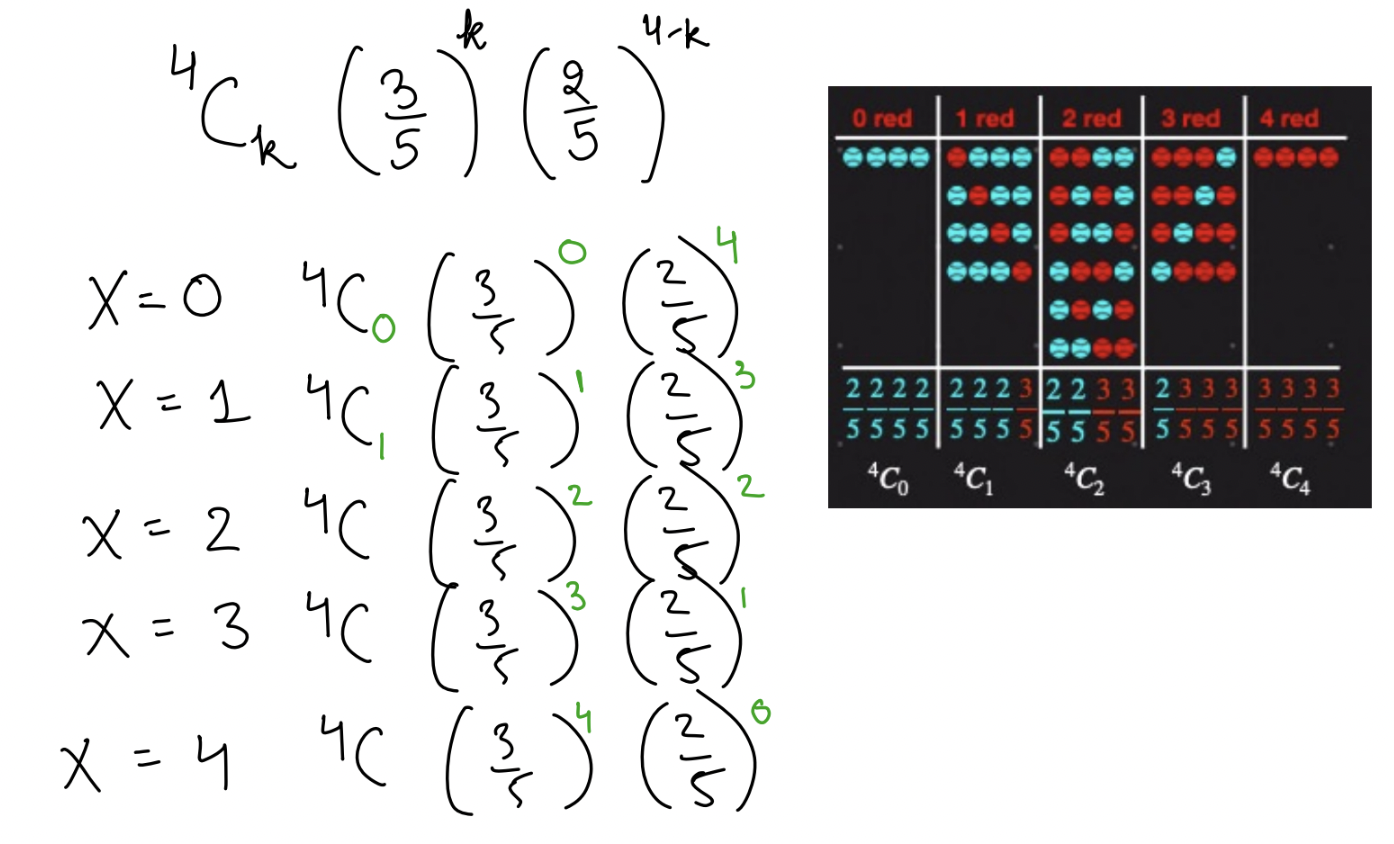

Now we've understood this in theory, but

> **How can we compute this in code?**

We will use built-in functions of the `math.comb()` library.

In [ ]:
import math



> How will we find the value of $^4C_0$?

In [ ]:
math.comb(4, 0)

1

As you can see this gave us the result of $\frac{4!}{0! * (4-0)!}$

Similarly, we can find $^4C_1$ as:

In [ ]:
math.comb(4, 1)

4

Let's evaluate the probability values $P(X)$ for all possible values of $X = \left \{0, 1, 2, 3, 4 \right \}$

In [ ]:
# P(X=0)
math.comb(4,0)* (3/5)**0 * (2/5)**4

0.025600000000000005

In [ ]:
# P(X=1)
math.comb(4,1)* (3/5)**1 * (2/5)**3

0.15360000000000004

In [ ]:
# P(X=2)
math.comb(4,2)* (3/5)**2 * (2/5)**2

0.3456000000000001

In [ ]:
# P(X=3)
math.comb(4,3)* (3/5)**3 * (2/5)**1

0.34559999999999996

In [ ]:
# P(X=4)
math.comb(4,4)* (3/5)**4 * (2/5)**0

0.1296

Let's compare these probability results to what we evaluated through the Empirical approach

Notice that these values are very close.

As discussed earlier, **if we increase the no of simulations, the observed result would be more and more closer to these theoretical values**.

Hence, proved.

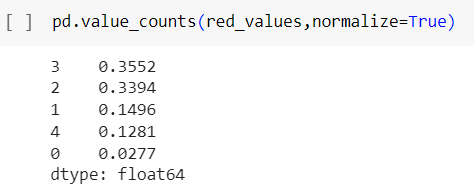

## <font color='purple'>**Binomial Distribution**</font>

You might not be aware, but while solving this Casino case study, we've also been deriving the equation for **Binomial Distribution.**

Let's summarize our findings, and look at this distribution formally.


Binomial distribution is a <font color='purple'>**discrete probability distribution**</font> of the number of successes in `n` **independent** experiments sequence.

A Binomial trial will always have <font color='purple'>**two possible outcomes**</font>:
- Success / Win
- Failure / Loss

<br>

We defined a **discrete random variable** $X$ that denoted number of red balls drawn.
- Note that the event of drawing a ball is independent.
- $X$ will be called a **Binomial RV**

Also, we were given some parameters in our problem, let's define them:
- $n$: No of independent trials
 - In our example, we draw balls 4 times, hence $n=4$
- $p$: Probability of success in one trial
 - In our example, this denotes the probability of drawing a red ball, hence <font color='purple'>$p = \frac{3}{5}$</font>
 - Therefore, <font color='purple'>$(1-p)$</font> becomes the probability of failure in each trial (i.e. drawing a blue ball, in this example)

<br>


Using these parameters, we can re-write the equation we derived in general form: <font color='purple'>$P(X = k) = \ ^nC_k \ (p)^k \ (1-p)^{n-k}$</font>

Let's plot our calculated values to see what Binomial distribution looks like.

In [ ]:
x = pd.value_counts(red_values, normalize=True)
x

3    0.3552
2    0.3394
1    0.1496
4    0.1281
0    0.0277
dtype: float64

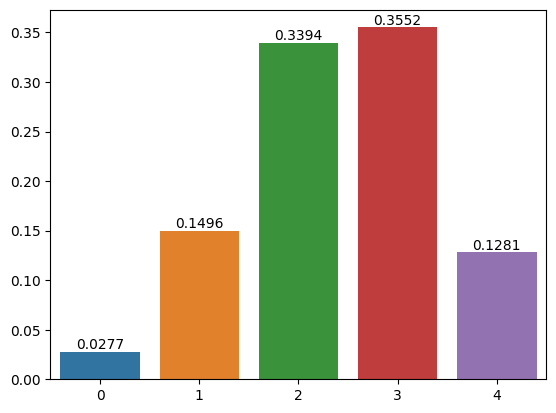

In [ ]:
ax = sns.barplot(x = x.index, y = x.values)

for i in ax.containers:
  ax.bar_label(i,)

This is the **Probabillity Mass Function (PMF)** of our given Binomial experiment, which is called as Binomial Probability Distribution
- The graph shows the probability of obtaining each possible number of successes (k) in n trials.
- The height of each bar represents the probability of that particular outcome.
- The sum of all the probabilities equals 1.

<br>

The `scipy.stats.binom` library gives us a built in function that eases the calculation of PMF values (i.e. value of $P(X)$ for specific values of $X$).

Instead of using the formula $P(X = k) = \ ^nC_k \ (p)^k \ (1-p)^{n-k}$, we can directly use this function to calculate the PMF value.

We just need to specify the 3 parameters:
- n
- k
- p

In [ ]:
from scipy.stats import binom

In [ ]:
prob_0_red = binom.pmf(n=4,p=3/5,k=0)
prob_0_red

0.025599999999999994

In [ ]:
prob_1_red = binom.pmf(n=4,p=3/5,k=1)
prob_1_red

0.15359999999999996

In [ ]:
prob_2_red = binom.pmf(n=4,p=3/5,k=2)
prob_2_red

0.3456

In [ ]:
prob_3_red = binom.pmf(n=4,p=3/5,k=3)
prob_3_red

0.3456000000000001

In [ ]:
prob_4_red = binom.pmf(n=4,p=3/5,k=4)
prob_4_red

0.1296

Notice that these values are the same as what we calculated using `math.comb`

### <font color='purple'>**Expectation using theoretical approach**</font>

> <font color='purple'>**How will we calculate the theoretical expectation value?**</font>

We know the formula: <font color='purple'>$E(X) = Σ_i X_i P(X = X_i)$</font>
- Here, we saw that we can calculate the probability values using `scipy.stats.binom`
- And that random variable $X = \left \{0, 1, 2, 3, 4 \right \}$

In [ ]:
expectation_theoretical= (0*prob_0_red) + (1*prob_1_red) + (2*prob_2_red) + (3*prob_3_red) + (4*prob_4_red)
expectation_theoretical

2.4000000000000004

Note that this is close to the <font color='purple'>**Empirical Expected value**</font> we calculated.

Alternately, there is a built-in function to find this expected value in `stats.binom`

Here, we need to pass the following arguments to `args`:
- n, and
- p

In [ ]:
binom.expect(args=(4,3/5))

2.4000000000000004

### <font color='purple'>**Variance in Binomial Distribution**</font>  

Recall that variance tells you how much the actual results might vary from the expected average (mean), helping you understand whether your observations are likely due to chance or if there's something more going on, like bias in the coin.   

<br>

### <font color='purple'>**Formula for Variance in Binomial Distribution**:</font>   

The formula for variance in a binomial distribution is:  

$\Large σ^2 = n * p * (1-p)$  

Where:

- $n$ is the number of trials (or coin flips in our example).  
- $p$ is the probability of success on each trial (the probability of getting heads in our coin flip example).  
- $(1−p)$ represents the probability of failure on each trial (the probability of getting tails).  

  - $(1-p)$ is also denoted as $q$ also, so  



$\Large σ^2 = n * p * (1-p)$   or   
$\Large σ^2 = npq$  






We learnt about the concept of Binomial distribution.

But we still haven't answered our question :

### <font color='purple'>**Would engaging in this game result in a profit or loss for you?**</font>

Let's define another random variable $Y$ that denotes the amount of money won/lost through gambling.
- Therefore, possible values of $Y: \left \{150, -10 \right \}$

Let's create a table for this random variable $Y$, with it's posibble values and corresponding probabilities.
- Case of winning Rs 150 ($Y = 150$)
 - <font color='purple'>$P(Y = 150)$ would be the same as $P(X = 4)$</font>
- Case of loosing Rs 10 ($Y = -10$)
 - <font color='purple'>$P(Y = -10) = P(X=0) + P(X=1) + P(X=2) + P(X=3) = 1 - P(X=4)$</font>

In [ ]:
# P(Y=150)
prob_4_red

0.1296

In [ ]:
#P(Y = -10)
1 - prob_4_red

0.8704000000000001

> <font color='purple'>**What would be expected value of $Y$?**</font>

$E(Y) = Σ_i Y_i P(Y = Y_i) = (150*0.1296) + (-10*0.8704000000000001)$

In [ ]:
expected_y = (150*0.1296) + (-10*0.8704000000000001)
expected_y

10.735999999999997

#### <font color='orange'>**Conclusion of the case study**:</font>

This value means that if we play many many times, at the end of the day, **we are expected to have profit of Rs 10.736**

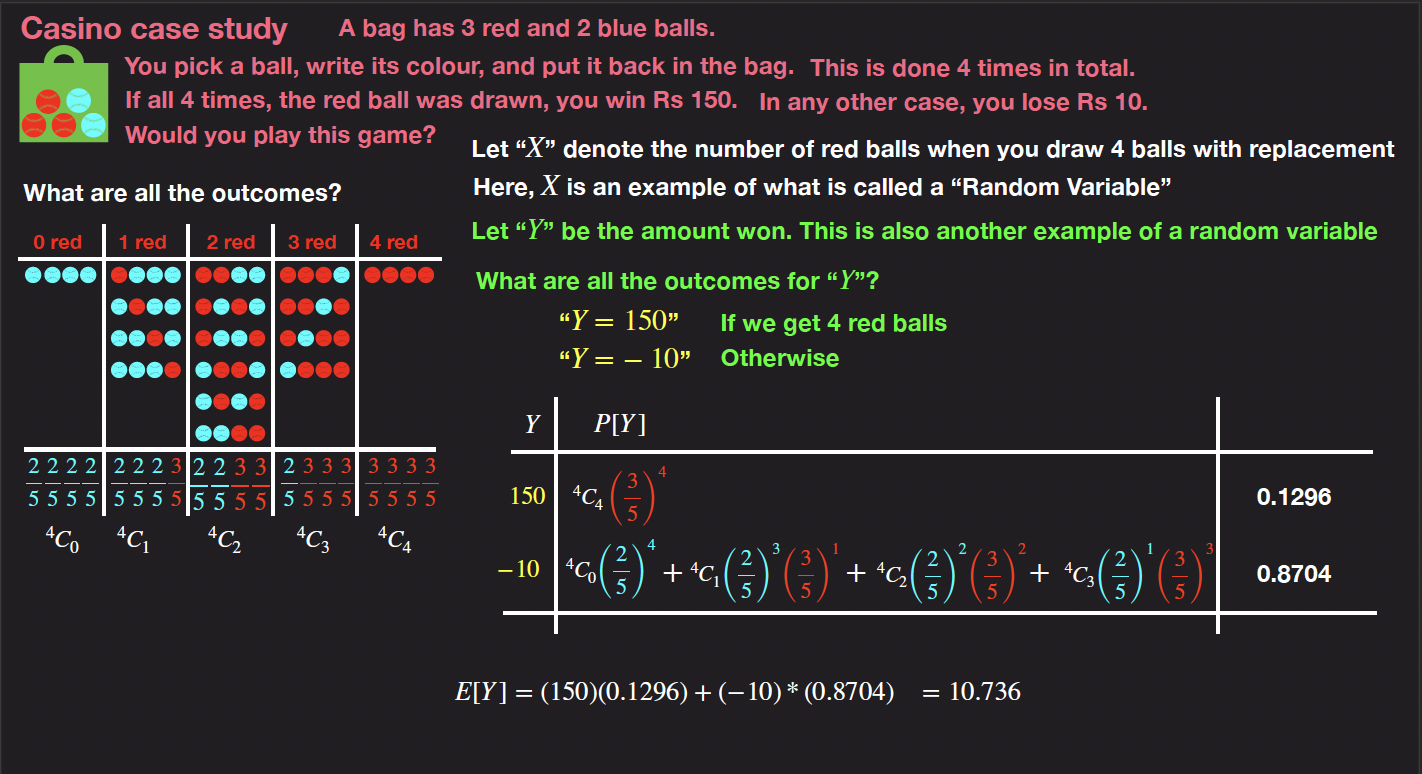

### <font color='purple'>Conditions of Binomial Experiment</font>

1. The experiment must consist of a **fixed number of trials (n)**, with only 2 possible outcomes: Success or Failure
 - Here, we had fixed $n=4$
 - So, we cannot increase or decrease it in between
 - We defined success as the event of drawing a red ball: $P(Success) = \frac{3}{5}$

2. Individual trials are **identical and independent**.
 - This needs to hold true, otherwise, the probability values might change for different trials.
 - In this example also, the trials of drawing balls were identical and independent, as we were replacing the balls after each draw.
 - Hence, it contained exactly same number of balls of each color.

3. The random variable denotes the number of success in `n` trials.

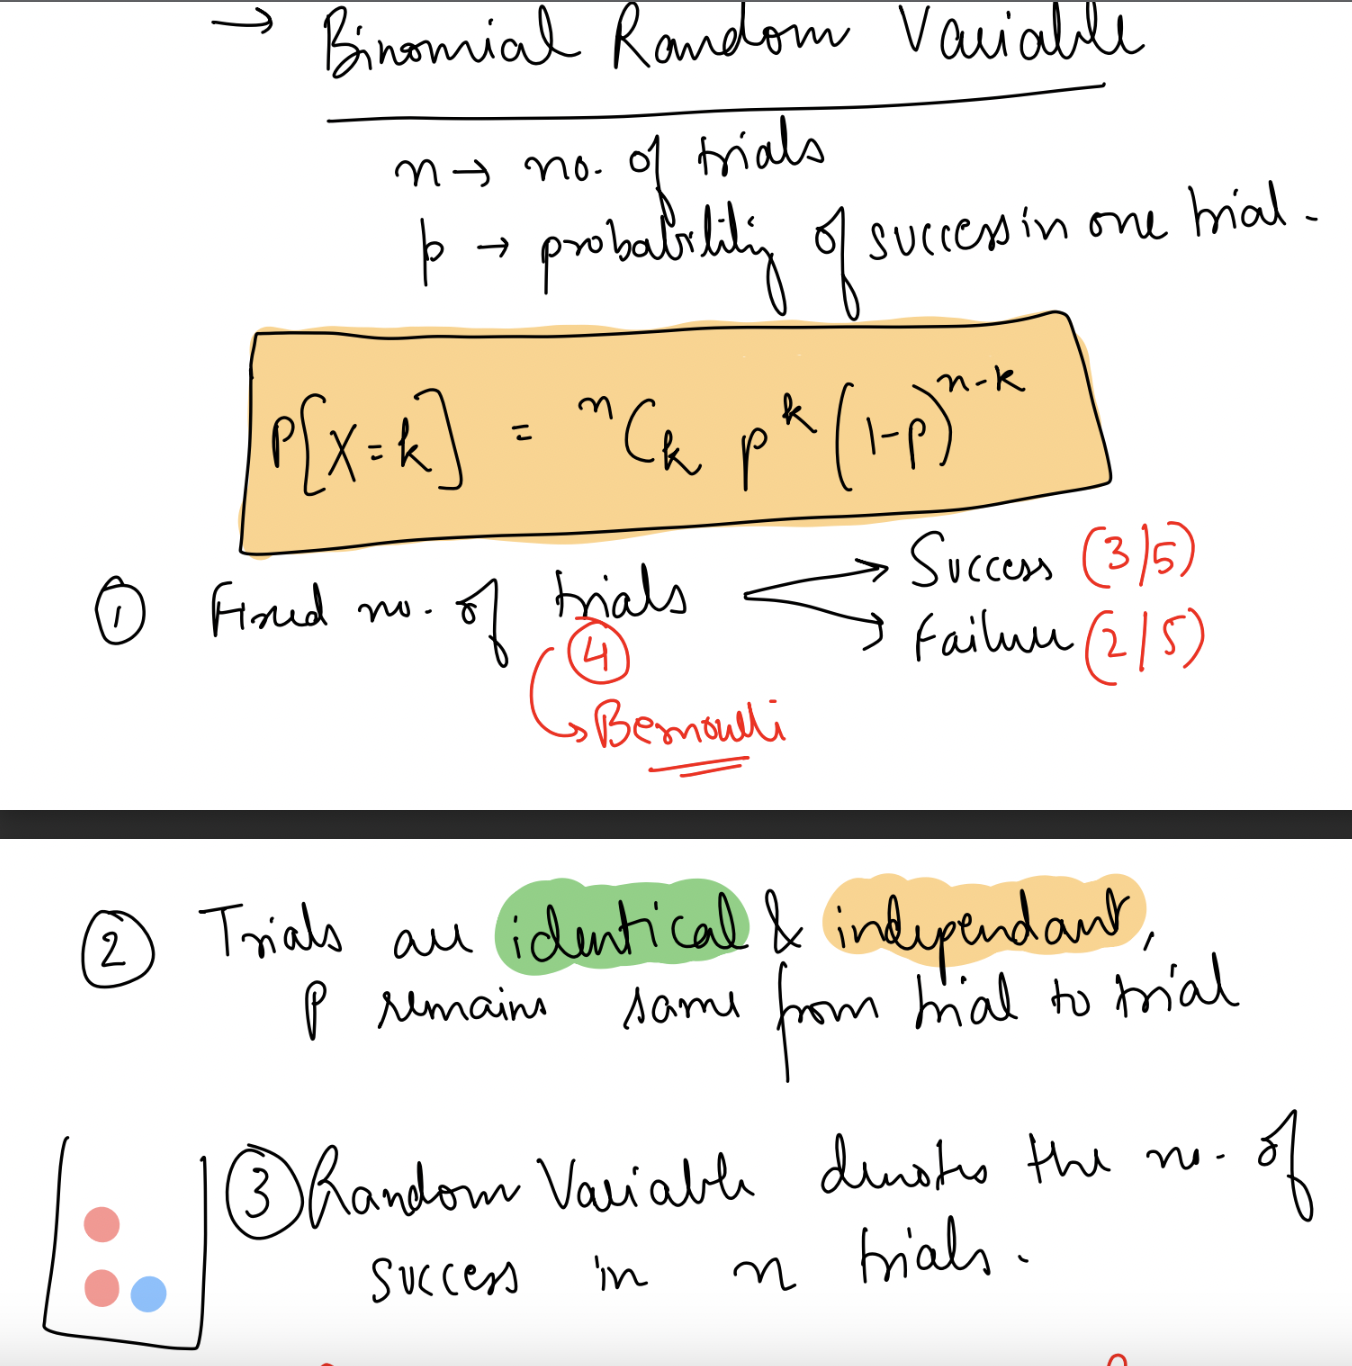


## <font color='purple'>**Bernoulli Trials**</font>

In the above example, it was conveyed clearly that we will draw a ball 4 times from the bag.

But let's consider the case when a ball is drawn from the bag, only one, i.e. **one trial**.

Like before, we still define $X$ as the event of getting a red ball.

Therefore, on drawing the ball, we get 2 possibilities:
- Getting a red ball (Success)
 - We know that probability for this will be: $P(Success) = p = \frac{3}{5}$
- Getting a blue ball (Failure)
 - Probability: $P(Failure) = 1-p = \frac{2}{5}$

<br>

This is known as a **Bernoulli Trial**.


Essentially, it is the **special case** of Binomial trial, where `n = 1`

Hence, it must also follow the condition that there must be only 2 possible outcomes:
- Success, or
- Failure

<br>

Let's plot this, to see what **Bernoulli distribution** looks like.

Text(0, 0.5, 'P(X)')

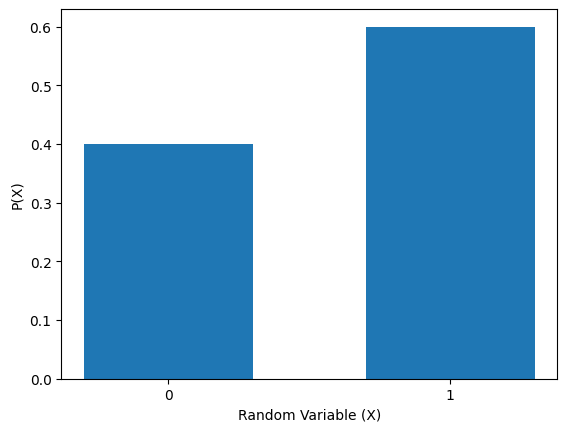

In [ ]:
x = [0, 1]
y = [2/5, 3/5]

plt.bar(x, y, width=0.6, tick_label=["0", "1"])
plt.xlabel("Random Variable (X)")
plt.ylabel("P(X)")

> **Another example of Bernoulli distribution**

Consider the situation of passing or failing an exam.
- Let’s assume the probability to pass the exam is 95%,
- Therefore the probability to fail will be 5%.

In this case, if the event to pass the exam is considered, then the Bernoulli event will contain the probability of passing the exam.

Similarly, it goes for failing the exam.

> **To summarize, what is the difference between Binomial and Bernoulli distribution?**

- Bernoulli deals with the outcome of the single trial of the event, whereas Binomial deals with the outcome of the multiple trials of the single event.

- Hence, we can define **Binomial distribution** in another way:

 `It is the collection of Bernoulli trials for the same event, i.e., it contains more than 1 Bernoulli event for the same scenario for which the Bernoulli trial is calculated.`


---

Let's take a look at another example problem

## <font color='purple'>Dice Example</font>

```
You toss 2 dice. If both dice are 6, you get Rs 2. Else, if one dice is 6, you get Rs 1.
Otherwise, you do not get anything.
```

Let's define a random variable $X$ that represents the amount of money won.
- Hence, it can take the values: $X = \left \{0, 1, 2 \right\}$

<br>

Answer the following questions.

> <font color='purple'>**What is the probability of getting the following?**</font>
- Rs 0
- Rs 1
- Rs 2

Let's visualize the possible outcomes through a table.
- Possible values of Dice 1 along the row
- Possible values of Dice 2 along the column
- Value corresponding to a row and col, represents the money won ($X$)


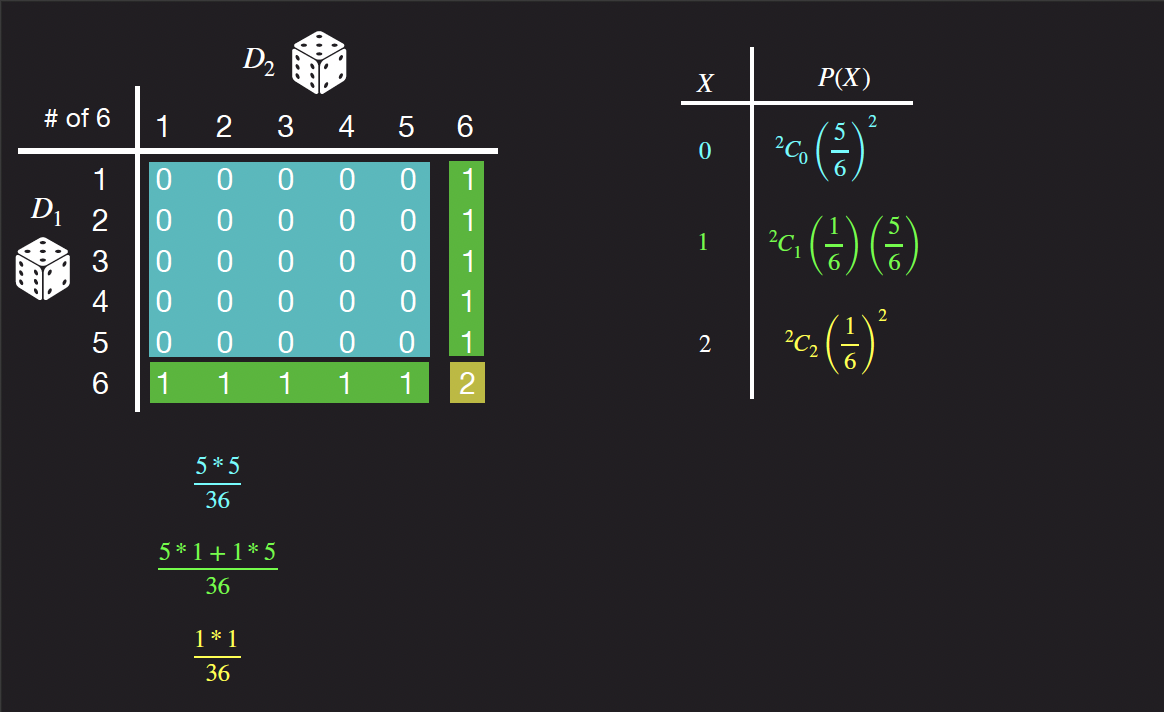



> **Finding $P(X=0)$**

From the table we can see that we will get 0 Rs for 25 outcomes, hence $P(X=0) = \frac{25}{36}$

<br>

> **Finding $P(X=1)$**

From the table, $P(X=1) = \frac{10}{36}$

<br>

> **Finding $P(X=2)$**

From the table, $P(X=2) = \frac{1}{36}$

Now, lets see if we can obtain the same answers using the Binomial formula

Before we get to solving, let's define the parameters:
- **What will be the value of `n`?**
 - Since we are throwing 2 dice, $n=2$
- **What will be the value of `p`?**
 - `p` is defined as the probability of succes in one trial
 - So how do we define success here?
 - Obtaining a 6
 - Therefore, p = probability of getting a 6 in a single dice roll, i.e. $p=\frac{1}{6}$

We know the Binomial formula is: $P(X = k) = \ ^nC_k \ (p)^k \ (1-p)^{n-k}$

Therefore,
- $P(X = 0) = \ ^2C_0 \ (\frac{1}{6})^0 \ (\frac{5}{6})^{2} = 1 * 1 * \frac{25}{36} = \frac{25}{36}$
- $P(X = 1) = \ ^2C_1 \ (\frac{1}{6})^1 \ (\frac{5}{6})^{1} = 2 * \frac{1}{6} * \frac{5}{6} = \frac{10}{36}$
- $P(X = 2) = \ ^2C_2 \ (\frac{1}{6})^2 \ (\frac{5}{6})^{0} = 1 * \frac{1}{36} * 1 = \frac{1}{36}$

<br>

These are the exact answers we got using the table above!!

Alternately, we could've evaluated the binomial formula using code as:

In [ ]:
binom.pmf(n=2,p=1/6,k=0)

0.6944444444444443

Now answer the second question.

> **What is the expected value of money won?**

We can find this using the formula: $E(X) = Σ_i X_i P(X = X_i)$

$= (0*\frac{25}{36}) + (1*\frac{10}{36}) + (2*\frac{1}{36})$

$=\frac{1}{3}$

<br>

Alternately, we can use the `stats.binom.expect()` function

In [ ]:
binom.expect(args=(2,1/6))

0.33333333333333326

<br>
<br>

---